In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import fileinput
import sys
import subprocess

In [202]:
## My original way: change the text file w/ python and then run through the terminal.

theta = 60*np.pi/180
phi = 60*np.pi/180
for line in fileinput.input("/home/carter/test.pov", inplace=1):
    if "light_source" in line:
        
        start = line.find( '<' )
        end = line.find( '>' )
        if start != -1 and end != -1:
            result = line[start+1:end]
        line = line.replace(result,str(((-1)**fileinput.lineno())*np.cos(theta)*np.sin(phi))+","+str(np.cos(phi))+","+str(((-1)**fileinput.lineno())*np.sin(theta)*np.sin(phi)))
    sys.stdout.write(line)

subprocess.Popen(["povray +Itest.pov Height=800 Width=600"],shell=True)


In [24]:
## New way: change text file and run it all through the terminal.

theta = 60*np.pi/180
phi = 60*np.pi/180

lightx = np.cos(theta)*np.sin(phi)*100000
lighty = np.cos(phi)*100000
lightz = np.sin(theta)*np.sin(phi)*100000
Options1 = " Declare=light1x="+str(lightx)+" Declare=light1y="+str(lighty)+" Declare=light1z="+str(lightz)
Options2 = " Declare=light2x="+str(-lightx)+" Declare=light2y="+str(lighty)+" Declare=light2z="+str(-lightz)

subprocess.Popen(["povray +Itest2.pov +H800 +W600"+Options1+Options2],shell=True)



208 ms ± 63.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


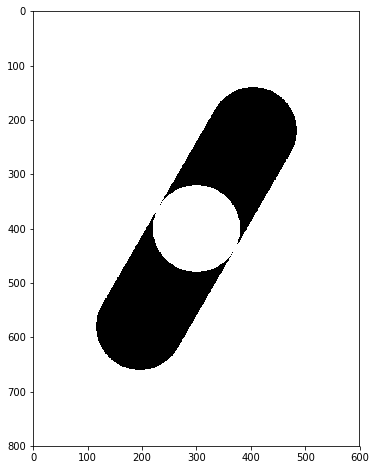

(800, 600, 3)

In [230]:
image = mpimg.imread("/home/carter/test.png")
gimg = np.dot(image, [0.2989, 0.5870, 0.1140])
mytrutharray = (gimg[int(np.shape(gimg)[0]/2)-1][int(np.shape(gimg)[1]/2)-1] < gimg) & (gimg < gimg[0][0])
image[mytrutharray] = 0
image[np.logical_not(mytrutharray)] = 1


fig1 = plt.figure(figsize = (8,8))
plt.imshow(image)
plt.show()
plt.close(fig1)

# print(image,"\n\n",gimg)
np.shape(image)

In [ ]:
# subprocess.Popen(["povray +Itest.pov Height=800 Width=600"],shell=True)